<a href="https://colab.research.google.com/github/hkbu-kennycheng/comp3925/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab9: Image Analysis

In [ ]:
!pip install requests opencv-python

In [3]:
import pandas as pd
import numpy as np

## Loading dataset

In [13]:
!curl https://gist.githubusercontent.com/hkbu-kennycheng/b95757c385ac5e49a1abb1434a966f6c/raw/5110cce1df181d67411c949c304655572740d0b9/pnk.csv > pnk.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4228k  100 4228k    0     0  23.4M      0 --:--:-- --:--:-- --:--:-- 23.4M


In [14]:
pnkdf = pd.read_csv('pnk.csv', index_col=0)
pnkdf

,name,id,url,pic,price,specialoffer,brand,category,variant,variantname,...,organic,eshoponly,healthyfat,crustacean,Product Details,Origin,Product Warnings,Product Usage,Storage Condition,Ingredients
0,Alkaline Water 9.0 (random Pick),499585,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,9.0,NaN,WATSONS,Water,499585,420ML,...,False,False,False,False,- Smart way to hydrate your body- Helps to neu...,Hong Kong,This product contains minerals and is electrol...,Consume shortly after opening.,Keep in a cool dry place away from direct sunl...,"Water, Ocean Mineral Concentrate"
1,Alkaline Water 9.0 (case) (420ml X 24 Bottles),378829,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,168.0,NaN,WATSONS,"Water,Bottled Water",378829,24X420ML,...,False,False,False,False,- Helps neutralize acidity-Help the body detox...,Hong Kong,Keep in a cool dry place away from direct sunl...,drink,Keep in a cool dry place away from direct sunl...,"Water, Ocean Mineral Concentrate"
2,L Type Interdental Brush 0.6mm - 6pcs,805629,https://www.parknshop.com/en/l-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,13.9,$20.8 / 2pcs,WATSONS,Dental Accessories & Denture,805629,6S,...,False,False,False,False,WATSONS ORAL CARE RANGE IS SPECIALLY DESIGNED ...,China,Do not force the interdental brush between tee...,1. PUT THE INTERDENTAL BRUSH BETWEEN THE TEETH...,"STORE IN A COOL, DRY PLACE AWAY FROM DIRECT SU...",NaN
3,L Type Interdental Brush 0.8mm 6pcs,805630,https://www.parknshop.com/en/l-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,13.9,$20.8 / 2pcs,WATSONS,Dental Accessories & Denture,805630,6S,...,False,False,False,False,WATSONS ORAL CARE RANGE IS SPECIALLY DESIGNED ...,China,Do not force the interdental brush between tee...,1. PUT THE INTERDENTAL BRUSH BETWEEN THE TEETH...,"STORE IN A COOL, DRY PLACE AWAY FROM DIRECT SU...",NaN
4,I Type Interdental Brush 0.7mm 5pcs,805627,https://www.parknshop.com/en/i-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,10.0,$15.0 / 2pcs,WATSONS,Dental Accessories & Denture,805627,5S,...,False,False,False,False,WATSONS ORAL CARE RANGE IS SPECIALLY DESIGNED ...,China,Do not force the interdental brush between tee...,1. PUT THE INTERDENTAL BRUSH BETWEEN THE TEETH...,"STORE IN A COOL, DRY PLACE AWAY FROM DIRECT SU...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,Kitchen Towel 9inch,365593,https://www.parknshop.com/en/kitchen-towel-9in...,https://www.parknshop.com/medias/sys_master/fr...,25.9,MONEYBACK MEMBER OFFER,BEST BUY,NaN,365593,6S,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
6723,Chauzhou Style Fish Balls,51761,https://www.parknshop.com/en/chauzhou-style-fi...,https://www.parknshop.com/medias/sys_master/fr...,8.4,MONEYBACK MEMBER OFFER,JIU LONG CHENG ZHAI,Seafood Balls,51761,170G/PKT,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
6724,Alkaline Ion Water,483353,https://www.parknshop.com/en/alkaline-ion-wate...,https://www.parknshop.com/medias/sys_master/fr...,19.9,MONEYBACK MEMBER OFFER,KIRIN,Water,483353,2L,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
6725,Mushroom Pork Ball,55251,https://www.parknshop.com/en/mushroom-pork-bal...,https://www.parknshop.com/medias/sys_master/fr...,13.9,MONEYBACK MEMBER OFFER,JIU LONG CHENG ZHAI,Meat Balls,55251,170G,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN


# Fetching image data

## Download image with `requests`

Let's download the image data by passing in the URL to `requests.get`.

In [5]:
import requests
import shutil
import tempfile
import cv2

img_url = 'https://www.parknshop.com/medias/sys_master/front/prd/9444607229982.jpg'

response = requests.get(img_url, headers={'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'}, stream=True)
if response.status_code == 200:
  response.raw.decode_content = True
  rawdata = np.frombuffer(response.raw.read(), dtype='uint8')
  img = cv2.imdecode(rawdata, cv2.IMREAD_COLOR)

In Google Colab, we will need to use `cv2_imshow` from `google.colab.patches` in order to display the image.

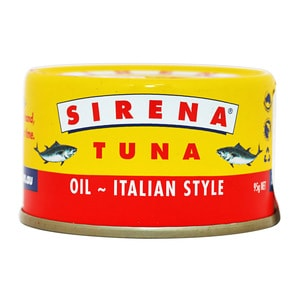

In [6]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)

Actuallt it's a 3d array consists of red, grenn and blue value for each pixel ranging from 0 to 255 in each value.

In [23]:
img.shape

(300, 300, 3)

In [7]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### Fetch image function

In [15]:
def fetchImage(url):
  response = requests.get(url, headers={'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'}, stream=True)
  if response.status_code == 200:
    response.raw.decode_content = True
    rawdata = np.frombuffer(response.raw.read(), dtype='uint8')
    return cv2.imdecode(rawdata, cv2.IMREAD_COLOR)
  return []
    

### Fetch all images in data frame

In [16]:
picdf = pd.DataFrame(pd.Series(pnkdf['pic'].unique(), name='pic'))
picdf

,pic
0,https://www.parknshop.com/medias/sys_master/fr...
1,https://www.parknshop.com/medias/sys_master/fr...
2,https://www.parknshop.com/medias/sys_master/fr...
3,https://www.parknshop.com/medias/sys_master/fr...
4,https://www.parknshop.com/medias/sys_master/fr...
...,...
6722,https://www.parknshop.com/medias/sys_master/fr...
6723,https://www.parknshop.com/medias/sys_master/fr...
6724,https://www.parknshop.com/medias/sys_master/fr...
6725,https://www.parknshop.com/medias/sys_master/fr...


In [ ]:
picdf['picdata'] = picdf['pic'].apply(fetchImage)

In [ ]:
picdf.to_pickle('picdf.pickle')

You may use my version of image data to reduce the loading time.

In [9]:
!curl -L https://www.comp.hkbu.edu.hk/~kennycheng/cs7113-8000/picdf.pickle > picdf.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1712M  100 1712M    0     0  11.1M      0  0:02:33  0:02:33 --:--:-- 11.0M


In [10]:
!sha256sum picdf.pickle

46a024ac257ebaff56b3e090d0551e341d54dc9a3726bca904b5288fb1a4370b  picdf.pickle


In [27]:
import pickle

picdf = pd.DataFrame()

with open('picdf.pickle', 'r+b') as f:
  picdf = pickle.load(f)

picdf

,pic,picdata
0,https://www.parknshop.com/medias/sys_master/fr...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,https://www.parknshop.com/medias/sys_master/fr...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,https://www.parknshop.com/medias/sys_master/fr...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,https://www.parknshop.com/medias/sys_master/fr...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,https://www.parknshop.com/medias/sys_master/fr...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...
6722,https://www.parknshop.com/medias/sys_master/fr...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
6723,https://www.parknshop.com/medias/sys_master/fr...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
6724,https://www.parknshop.com/medias/sys_master/fr...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
6725,https://www.parknshop.com/medias/sys_master/fr...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


### Merge `pnkdf` and `picdf` as `df`

In [28]:
df = pd.merge(pnkdf, picdf, on='pic')

In [29]:
df

,name,id,url,pic,price,specialoffer,brand,category,variant,variantname,...,eshoponly,healthyfat,crustacean,Product Details,Origin,Product Warnings,Product Usage,Storage Condition,Ingredients,picdata
0,Alkaline Water 9.0 (random Pick),499585,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,9.0,NaN,WATSONS,Water,499585,420ML,...,False,False,False,- Smart way to hydrate your body- Helps to neu...,Hong Kong,This product contains minerals and is electrol...,Consume shortly after opening.,Keep in a cool dry place away from direct sunl...,"Water, Ocean Mineral Concentrate","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,Alkaline Water 9.0 (case) (420ml X 24 Bottles),378829,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,168.0,NaN,WATSONS,"Water,Bottled Water",378829,24X420ML,...,False,False,False,- Helps neutralize acidity-Help the body detox...,Hong Kong,Keep in a cool dry place away from direct sunl...,drink,Keep in a cool dry place away from direct sunl...,"Water, Ocean Mineral Concentrate","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,L Type Interdental Brush 0.6mm - 6pcs,805629,https://www.parknshop.com/en/l-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,13.9,$20.8 / 2pcs,WATSONS,Dental Accessories & Denture,805629,6S,...,False,False,False,WATSONS ORAL CARE RANGE IS SPECIALLY DESIGNED ...,China,Do not force the interdental brush between tee...,1. PUT THE INTERDENTAL BRUSH BETWEEN THE TEETH...,"STORE IN A COOL, DRY PLACE AWAY FROM DIRECT SU...",NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,L Type Interdental Brush 0.8mm 6pcs,805630,https://www.parknshop.com/en/l-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,13.9,$20.8 / 2pcs,WATSONS,Dental Accessories & Denture,805630,6S,...,False,False,False,WATSONS ORAL CARE RANGE IS SPECIALLY DESIGNED ...,China,Do not force the interdental brush between tee...,1. PUT THE INTERDENTAL BRUSH BETWEEN THE TEETH...,"STORE IN A COOL, DRY PLACE AWAY FROM DIRECT SU...",NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,I Type Interdental Brush 0.7mm 5pcs,805627,https://www.parknshop.com/en/i-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,10.0,$15.0 / 2pcs,WATSONS,Dental Accessories & Denture,805627,5S,...,False,False,False,WATSONS ORAL CARE RANGE IS SPECIALLY DESIGNED ...,China,Do not force the interdental brush between tee...,1. PUT THE INTERDENTAL BRUSH BETWEEN THE TEETH...,"STORE IN A COOL, DRY PLACE AWAY FROM DIRECT SU...",NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,Kitchen Towel 9inch,365593,https://www.parknshop.com/en/kitchen-towel-9in...,https://www.parknshop.com/medias/sys_master/fr...,25.9,MONEYBACK MEMBER OFFER,BEST BUY,NaN,365593,6S,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
6723,Chauzhou Style Fish Balls,51761,https://www.parknshop.com/en/chauzhou-style-fi...,https://www.parknshop.com/medias/sys_master/fr...,8.4,MONEYBACK MEMBER OFFER,JIU LONG CHENG ZHAI,Seafood Balls,51761,170G/PKT,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
6724,Alkaline Ion Water,483353,https://www.parknshop.com/en/alkaline-ion-wate...,https://www.parknshop.com/medias/sys_master/fr...,19.9,MONEYBACK MEMBER OFFER,KIRIN,Water,483353,2L,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
6725,Mushroom Pork Ball,55251,https://www.parknshop.com/en/mushroom-pork-bal...,https://www.parknshop.com/medias/sys_master/fr...,13.9,MONEYBACK MEMBER OFFER,JIU LONG CHENG ZHAI,Meat Balls,55251,170G,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


## Color channel and shape

### Shape

There are 3 channels in image for different color (blue, green, red). Thus the data shape for an image would like this.

In [ ]:
img.shape

(300, 300, 3)

In [ ]:
img[:,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
img[:,:,0].reshape(90000) # flatten

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

### Blue

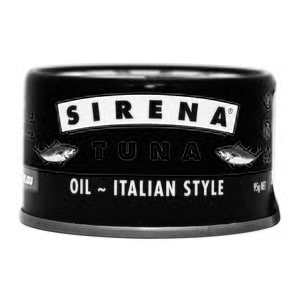

In [ ]:
cv2_imshow(img[:,:,0]) # showing only blue channel values

### Green

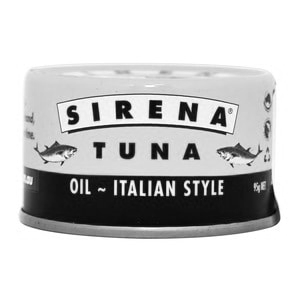

In [ ]:
cv2_imshow(img[:,:,1]) # showing only green channel values

### Red

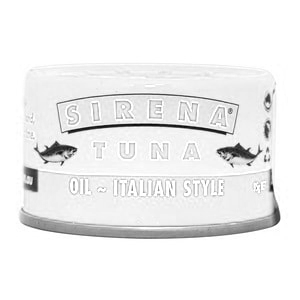

In [ ]:
cv2_imshow(img[:,:,2]) # showing only red channel values

## Color space

### RGB

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/RGB_Cube_Show_lowgamma_cutout_b.png/1280px-RGB_Cube_Show_lowgamma_cutout_b.png)

But actullay in OpenCV, the RGB value is arranged in BGR sequence.

### HSL and HSV

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Hsl-hsv_models.svg/1024px-Hsl-hsv_models.svg.png)

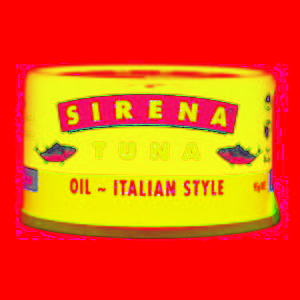

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

### YUV

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/YUV_UV_plane.svg/1024px-YUV_UV_plane.svg.png)

When Y = 0.5, Y is the brightness value ranged from 0 to 1.

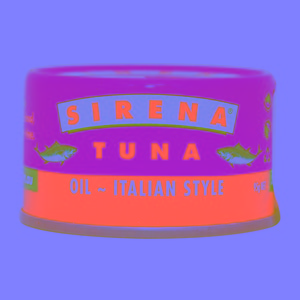

In [ ]:
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2_imshow(yuv)

# Image operations

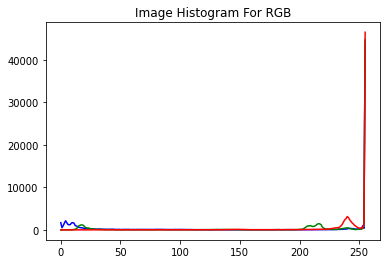

In [ ]:
import matplotlib.pyplot as plt

bluehist = cv2.calcHist([img],[0],None,[256],[0,256])
greenhist = cv2.calcHist([img],[1],None,[256],[0,256])
redhist = cv2.calcHist([img],[2],None,[256],[0,256])
  
# plot the above computed histogram
plt.plot(bluehist, color='b')
plt.plot(greenhist, color='g')
plt.plot(redhist, color='r')
plt.title('Image Histogram For RGB')
plt.show()

## Cropping an image

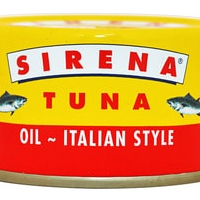

In [ ]:
cropimg = img[50:250:,50:250,:]
cv2_imshow(cropimg)

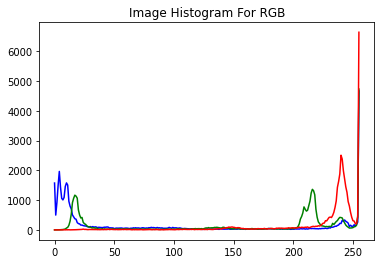

In [ ]:
bluehist = cv2.calcHist([cropimg],[0],None,[256],[0,256])
greenhist = cv2.calcHist([cropimg],[1],None,[256],[0,256])
redhist = cv2.calcHist([cropimg],[2],None,[256],[0,256])
  
# plot the above computed histogram
plt.plot(bluehist, color='b')
plt.plot(greenhist, color='g')
plt.plot(redhist, color='r')
plt.title('Image Histogram For RGB')
plt.show()

## Resize image with opencv

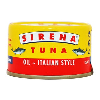

In [ ]:
cv2_imshow(cv2.resize(img, (100, 100)))

# Image feature extraction

## Color names

In [16]:
!pip install webcolors

In [21]:
import webcolors

### List of color names

In [ ]:
webcolors.CSS3_HEX_TO_NAMES

{'#000000': 'black',
 '#000080': 'navy',
 '#00008b': 'darkblue',
 '#0000cd': 'mediumblue',
 '#0000ff': 'blue',
 '#006400': 'darkgreen',
 '#008000': 'green',
 '#008080': 'teal',
 '#008b8b': 'darkcyan',
 '#00bfff': 'deepskyblue',
 '#00ced1': 'darkturquoise',
 '#00fa9a': 'mediumspringgreen',
 '#00ff00': 'lime',
 '#00ff7f': 'springgreen',
 '#00ffff': 'cyan',
 '#191970': 'midnightblue',
 '#1e90ff': 'dodgerblue',
 '#20b2aa': 'lightseagreen',
 '#228b22': 'forestgreen',
 '#2e8b57': 'seagreen',
 '#2f4f4f': 'darkslategray',
 '#32cd32': 'limegreen',
 '#3cb371': 'mediumseagreen',
 '#40e0d0': 'turquoise',
 '#4169e1': 'royalblue',
 '#4682b4': 'steelblue',
 '#483d8b': 'darkslateblue',
 '#48d1cc': 'mediumturquoise',
 '#4b0082': 'indigo',
 '#556b2f': 'darkolivegreen',
 '#5f9ea0': 'cadetblue',
 '#6495ed': 'cornflowerblue',
 '#66cdaa': 'mediumaquamarine',
 '#696969': 'dimgray',
 '#6a5acd': 'slateblue',
 '#6b8e23': 'olivedrab',
 '#708090': 'slategray',
 '#778899': 'lightslategray',
 '#7b68ee': 'mediumslat

### Count colors

In [22]:
colors = {}
for c in webcolors.CSS3_HEX_TO_NAMES.values():
  colors[c] = 0

img_shape = img.shape
flatten_img = img.reshape(img_shape[0] * img_shape[1], 3)
for pixel in flatten_img:
  try:
    colors[webcolors.rgb_to_name(pixel)] += 1
  except:
    pass

colors

{'aliceblue': 2,
 'antiquewhite': 0,
 'aquamarine': 0,
 'azure': 0,
 'beige': 0,
 'bisque': 0,
 'black': 0,
 'blanchedalmond': 0,
 'blue': 0,
 'blueviolet': 0,
 'brown': 0,
 'burlywood': 0,
 'cadetblue': 0,
 'chartreuse': 0,
 'chocolate': 0,
 'coral': 0,
 'cornflowerblue': 0,
 'cornsilk': 0,
 'crimson': 0,
 'cyan': 0,
 'darkblue': 0,
 'darkcyan': 0,
 'darkgoldenrod': 0,
 'darkgray': 0,
 'darkgreen': 0,
 'darkkhaki': 0,
 'darkmagenta': 0,
 'darkolivegreen': 0,
 'darkorange': 0,
 'darkorchid': 0,
 'darkred': 0,
 'darksalmon': 0,
 'darkseagreen': 0,
 'darkslateblue': 0,
 'darkslategray': 0,
 'darkturquoise': 0,
 'darkviolet': 0,
 'deeppink': 0,
 'deepskyblue': 0,
 'dimgray': 0,
 'dodgerblue': 0,
 'firebrick': 0,
 'floralwhite': 1,
 'forestgreen': 0,
 'gainsboro': 0,
 'ghostwhite': 0,
 'gold': 0,
 'goldenrod': 0,
 'gray': 0,
 'green': 0,
 'greenyellow': 0,
 'honeydew': 0,
 'hotpink': 0,
 'indianred': 0,
 'indigo': 0,
 'ivory': 0,
 'khaki': 0,
 'lavender': 0,
 'lavenderblush': 0,
 'lawngree

#### Count colors in df

Initialize color count to zero in `df`.

In [28]:
for c in webcolors.CSS3_HEX_TO_NAMES.values():
  df[c] = 0
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,name,id,url,pic,price,specialoffer,brand,category,variant,variantname,...,teal,thistle,tomato,turquoise,violet,wheat,white,whitesmoke,yellow,yellowgreen
0,Alkaline Water 9.0 (random Pick),499585,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,9.0,NaN,WATSONS,Water,499585,420ML,...,0,0,0,0,0,0,0,0,0,0
1,Alkaline Water 9.0 (case) (420ml X 24 Bottles),378829,https://www.parknshop.com/en/alkaline-water-9-...,https://www.parknshop.com/medias/sys_master/fr...,168.0,NaN,WATSONS,"Water,Bottled Water",378829,24X420ML,...,0,0,0,0,0,0,0,0,0,0
2,L Type Interdental Brush 0.6mm - 6pcs,805629,https://www.parknshop.com/en/l-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,13.9,$20.8 / 2pcs,WATSONS,Dental Accessories & Denture,805629,6S,...,0,0,0,0,0,0,0,0,0,0
3,L Type Interdental Brush 0.8mm 6pcs,805630,https://www.parknshop.com/en/l-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,13.9,$20.8 / 2pcs,WATSONS,Dental Accessories & Denture,805630,6S,...,0,0,0,0,0,0,0,0,0,0
4,I Type Interdental Brush 0.7mm 5pcs,805627,https://www.parknshop.com/en/i-type-interdenta...,https://www.parknshop.com/medias/sys_master/fr...,10.0,$15.0 / 2pcs,WATSONS,Dental Accessories & Denture,805627,5S,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,Kitchen Towel 9inch,365593,https://www.parknshop.com/en/kitchen-towel-9in...,https://www.parknshop.com/medias/sys_master/fr...,25.9,MONEYBACK MEMBER OFFER,BEST BUY,NaN,365593,6S,...,0,0,0,0,0,0,0,0,0,0
6723,Chauzhou Style Fish Balls,51761,https://www.parknshop.com/en/chauzhou-style-fi...,https://www.parknshop.com/medias/sys_master/fr...,8.4,MONEYBACK MEMBER OFFER,JIU LONG CHENG ZHAI,Seafood Balls,51761,170G/PKT,...,0,0,0,0,0,0,0,0,0,0
6724,Alkaline Ion Water,483353,https://www.parknshop.com/en/alkaline-ion-wate...,https://www.parknshop.com/medias/sys_master/fr...,19.9,MONEYBACK MEMBER OFFER,KIRIN,Water,483353,2L,...,0,0,0,0,0,0,0,0,0,0
6725,Mushroom Pork Ball,55251,https://www.parknshop.com/en/mushroom-pork-bal...,https://www.parknshop.com/medias/sys_master/fr...,13.9,MONEYBACK MEMBER OFFER,JIU LONG CHENG ZHAI,Meat Balls,55251,170G,...,0,0,0,0,0,0,0,0,0,0


Wrapping code with a function

In [51]:
def countColors(row):
  datashape = row['picdata'].shape
  flattendata = row['picdata'].reshape(datashape[0] * datashape[1], 3)
  for c in flattendata:
    try:
      row[webcolors.rgb_to_name(c)] += 1
    except:
      pass
  return row

And then apply it to the `df`, and it will take very long time to process.

In [ ]:
df = df.apply(countColors, axis=1)

## Extract text with Optical character recognition (OCR)

In [ ]:
!add-apt-repository -y ppa:alex-p/tesseract-ocr5
!apt install -y tesseract-ocr tesseract-ocr-all
!pip install pytesseract

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://ppa.launchpad.net/alex-p/tesseract-ocr5/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.ne

### Supported languages

In [ ]:
import pytesseract

pytesseract.get_languages()

['afr',
 'amh',
 'ara',
 'asm',
 'aze',
 'aze_cyrl',
 'bel',
 'ben',
 'bod',
 'bos',
 'bre',
 'bul',
 'cat',
 'ceb',
 'ces',
 'chi_sim',
 'chi_sim_vert',
 'chi_tra',
 'chi_tra_vert',
 'chr',
 'cos',
 'cym',
 'dan',
 'deu',
 'div',
 'dzo',
 'ell',
 'eng',
 'enm',
 'epo',
 'est',
 'eus',
 'fao',
 'fas',
 'fil',
 'fin',
 'fra',
 'frk',
 'frm',
 'fry',
 'gla',
 'gle',
 'glg',
 'grc',
 'guj',
 'hat',
 'heb',
 'hin',
 'hrv',
 'hun',
 'hye',
 'iku',
 'ind',
 'isl',
 'ita',
 'ita_old',
 'jav',
 'jpn',
 'jpn_vert',
 'kan',
 'kat',
 'kat_old',
 'kaz',
 'khm',
 'kir',
 'kmr',
 'kor',
 'kor_vert',
 'lao',
 'lat',
 'lav',
 'lit',
 'ltz',
 'mal',
 'mar',
 'mkd',
 'mlt',
 'mon',
 'mri',
 'msa',
 'mya',
 'nep',
 'nld',
 'nor',
 'oci',
 'ori',
 'osd',
 'pan',
 'pol',
 'por',
 'pus',
 'que',
 'ron',
 'rus',
 'san',
 'sin',
 'slk',
 'slv',
 'snd',
 'spa',
 'spa_old',
 'sqi',
 'srp',
 'srp_latn',
 'sun',
 'swa',
 'swe',
 'syr',
 'tam',
 'tat',
 'tel',
 'tgk',
 'tha',
 'tir',
 'ton',
 'tur',
 'uig',
 'ukr'

### English

In [ ]:
from PIL import Image

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
data = pytesseract.image_to_data(Image.fromarray(img_rgb), lang='eng', output_type='data.frame')
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,300,300,-1.000000,NaN
1,2,1,1,0,0,0,27,132,236,36,-1.000000,NaN
2,3,1,1,1,0,0,27,132,236,36,-1.000000,NaN
3,4,1,1,1,1,0,27,132,236,36,-1.000000,NaN
4,5,1,1,1,1,1,27,128,55,44,67.336014,Wer
5,5,1,1,1,1,2,93,142,170,26,84.737602,TUNA
6,5,1,1,1,1,3,217,128,48,44,55.951065,sty
7,2,1,2,0,0,0,264,90,11,72,-1.000000,NaN
8,3,1,2,1,0,0,264,90,11,72,-1.000000,NaN
9,4,1,2,1,1,0,264,90,11,72,-1.000000,NaN


In [ ]:
text = pytesseract.image_to_string(Image.fromarray(img), lang='eng')
text

'Wer TUNA sth\n\nae ae\n\nOIL ~ ITALIAN STYLE 9°\n\n'

### Chinese

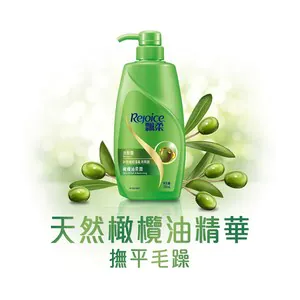

In [ ]:
chineseimg = fetchImage('https://www.parknshop.com/medias/sys_master/front/prd/9346157117470.jpg')
cv2_imshow(chineseimg)

In [ ]:
chineseimg_rgb = cv2.cvtColor(chineseimg, cv2.COLOR_BGR2RGB)
data = pytesseract.image_to_data(Image.fromarray(chineseimg_rgb), lang='chi_tra', output_type='data.frame')
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,300,300,-1.000000,NaN
1,2,1,1,0,0,0,51,210,198,58,-1.000000,NaN
2,3,1,1,1,0,0,51,210,198,58,-1.000000,NaN
3,4,1,1,1,1,0,51,210,198,33,-1.000000,NaN
4,5,1,1,1,1,1,51,216,24,27,93.211212,天
5,5,1,1,1,1,2,86,216,38,27,91.862755,然
6,5,1,1,1,1,3,123,206,26,49,0.000000,橄
7,5,1,1,1,1,4,148,210,14,33,53.834908,檻
8,5,1,1,1,1,5,175,216,15,27,84.086998,油
9,5,1,1,1,1,6,206,216,14,27,51.076031,精
